# 1. A simple MATLAB function

In [12]:
import os
from pathlib import Path
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm

# identity matrix
A = np.eye(5, dtype=int)

print(A)

[[1 0 0 0 0]
 [0 1 0 0 0]
 [0 0 1 0 0]
 [0 0 0 1 0]
 [0 0 0 0 1]]


# 2. Linear regression with one variable
## 2.1 Plotting the data

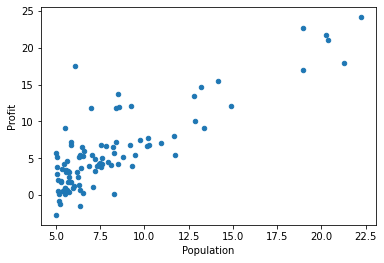

[[ 6.1101]
 [ 5.5277]
 [ 8.5186]
 [ 7.0032]
 [ 5.8598]
 [ 8.3829]
 [ 7.4764]
 [ 8.5781]
 [ 6.4862]
 [ 5.0546]
 [ 5.7107]
 [14.164 ]
 [ 5.734 ]
 [ 8.4084]
 [ 5.6407]
 [ 5.3794]
 [ 6.3654]
 [ 5.1301]
 [ 6.4296]
 [ 7.0708]
 [ 6.1891]
 [20.27  ]
 [ 5.4901]
 [ 6.3261]
 [ 5.5649]
 [18.945 ]
 [12.828 ]
 [10.957 ]
 [13.176 ]
 [22.203 ]
 [ 5.2524]
 [ 6.5894]
 [ 9.2482]
 [ 5.8918]
 [ 8.2111]
 [ 7.9334]
 [ 8.0959]
 [ 5.6063]
 [12.836 ]
 [ 6.3534]
 [ 5.4069]
 [ 6.8825]
 [11.708 ]
 [ 5.7737]
 [ 7.8247]
 [ 7.0931]
 [ 5.0702]
 [ 5.8014]
 [11.7   ]
 [ 5.5416]
 [ 7.5402]
 [ 5.3077]
 [ 7.4239]
 [ 7.6031]
 [ 6.3328]
 [ 6.3589]
 [ 6.2742]
 [ 5.6397]
 [ 9.3102]
 [ 9.4536]
 [ 8.8254]
 [ 5.1793]
 [21.279 ]
 [14.908 ]
 [18.959 ]
 [ 7.2182]
 [ 8.2951]
 [10.236 ]
 [ 5.4994]
 [20.341 ]
 [10.136 ]
 [ 7.3345]
 [ 6.0062]
 [ 7.2259]
 [ 5.0269]
 [ 6.5479]
 [ 7.5386]
 [ 5.0365]
 [10.274 ]
 [ 5.1077]
 [ 5.7292]
 [ 5.1884]
 [ 6.3557]
 [ 9.7687]
 [ 6.5159]
 [ 8.5172]
 [ 9.1802]
 [ 6.002 ]
 [ 5.5204]
 [ 5.0594]
 [ 5.7077]

In [13]:
# load and analyze data
data_file_1 = Path(os.path.abspath('')).absolute() / "data" / "ex1data1.txt"
data_set_1 = pd.read_csv(data_file_1, header=None, names=["Population", "Profit"])
# print(data_set_1)
# print(data_set_1.head())
# print(data_set_1.describe())

# make plot of dataframe. by default, matplotlib backend is used.
data_set_1.plot(kind='scatter', x='Population', y='Profit')
plt.show()

# extract data
x = np.array(data_set_1.iloc[:, :1])
y = np.array(data_set_1.iloc[:, 1:])
print(x)
print(y)

## 2.2 Gradient Descent
### 2.2.1 Update Equations
### 2.2.2 Implementation

In [14]:
# number of training examples
m = len(x)
# insert np.ones(m) to column 0
X = np.insert(x, 0, np.ones(m), axis=1)
print(X)
# init theta with 0s
init_theta = np.zeros((2,1))
print(init_theta)
iterations = 1500
alpha = 0.01

X.shape, y.shape, init_theta.shape


[[ 1.      6.1101]
 [ 1.      5.5277]
 [ 1.      8.5186]
 [ 1.      7.0032]
 [ 1.      5.8598]
 [ 1.      8.3829]
 [ 1.      7.4764]
 [ 1.      8.5781]
 [ 1.      6.4862]
 [ 1.      5.0546]
 [ 1.      5.7107]
 [ 1.     14.164 ]
 [ 1.      5.734 ]
 [ 1.      8.4084]
 [ 1.      5.6407]
 [ 1.      5.3794]
 [ 1.      6.3654]
 [ 1.      5.1301]
 [ 1.      6.4296]
 [ 1.      7.0708]
 [ 1.      6.1891]
 [ 1.     20.27  ]
 [ 1.      5.4901]
 [ 1.      6.3261]
 [ 1.      5.5649]
 [ 1.     18.945 ]
 [ 1.     12.828 ]
 [ 1.     10.957 ]
 [ 1.     13.176 ]
 [ 1.     22.203 ]
 [ 1.      5.2524]
 [ 1.      6.5894]
 [ 1.      9.2482]
 [ 1.      5.8918]
 [ 1.      8.2111]
 [ 1.      7.9334]
 [ 1.      8.0959]
 [ 1.      5.6063]
 [ 1.     12.836 ]
 [ 1.      6.3534]
 [ 1.      5.4069]
 [ 1.      6.8825]
 [ 1.     11.708 ]
 [ 1.      5.7737]
 [ 1.      7.8247]
 [ 1.      7.0931]
 [ 1.      5.0702]
 [ 1.      5.8014]
 [ 1.     11.7   ]
 [ 1.      5.5416]
 [ 1.      7.5402]
 [ 1.      5.3077]
 [ 1.      7

((97, 2), (97, 1), (2, 1))

### 2.2.3 Computing the cost function

In [15]:
# compute cost
def compute_cost(X, y, theta):
    m = len(y)
    sum = 0
    for i in range(0, m):
        diff = X[i] @ theta - y[i]
        sum += diff.item() ** 2
    return 1 / (2 * m) * sum

print(compute_cost(X, y, init_theta))
# init theta with [[-1],[2]]
print(compute_cost(X, y, np.array([[-1],[2]])))

# simpler vectorized method
def vectorized_compute_cost(X, y, theta):
    m = len(y)
    h = X @ theta
    diff = h - y
    res = 1 / (2 * m) * np.sum(np.square(diff)) 
    return res

print(vectorized_compute_cost(X, y, init_theta))
# init theta with [[-1],[2]]
print(vectorized_compute_cost(X, y, np.array([[-1],[2]])))

32.072733877455654
54.24245508201238
32.072733877455676
54.24245508201238


### 2.2.4 Gradient descent

[[-2.86779958]
 [ 1.08976177]]
[4.573873373548346, 4.5736987771296125, 4.573524495295822, 4.573350527480161]
prediction 1: population 3.5, profit 0.9463666240985726
prediction 1: population 7, profit 4.760532827376785
[ 5.0269      5.20039596  5.37389192  5.54738788  5.72088384  5.8943798
  6.06787576  6.24137172  6.41486768  6.58836364  6.7618596   6.93535556
  7.10885152  7.28234747  7.45584343  7.62933939  7.80283535  7.97633131
  8.14982727  8.32332323  8.49681919  8.67031515  8.84381111  9.01730707
  9.19080303  9.36429899  9.53779495  9.71129091  9.88478687 10.05828283
 10.23177879 10.40527475 10.57877071 10.75226667 10.92576263 11.09925859
 11.27275455 11.44625051 11.61974646 11.79324242 11.96673838 12.14023434
 12.3137303  12.48722626 12.66072222 12.83421818 13.00771414 13.1812101
 13.35470606 13.52820202 13.70169798 13.87519394 14.0486899  14.22218586
 14.39568182 14.56917778 14.74267374 14.9161697  15.08966566 15.26316162
 15.43665758 15.61015354 15.78364949 15.95714545 16.13

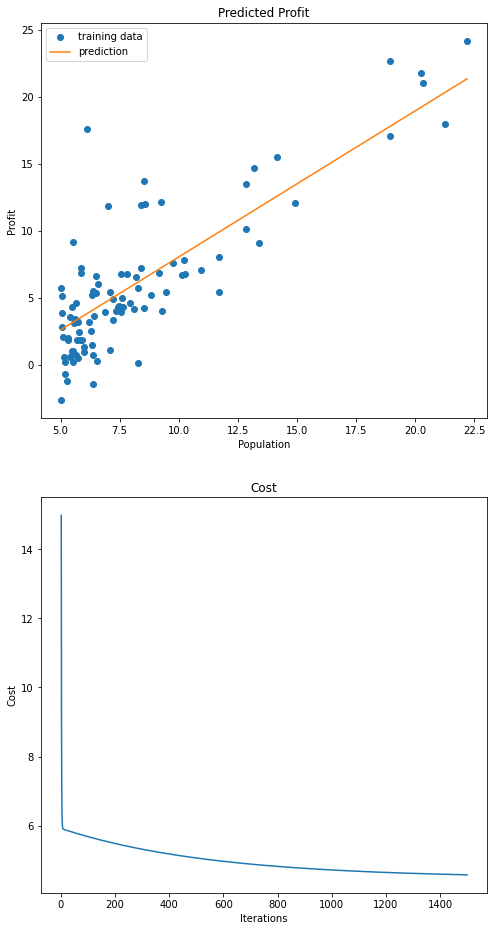

In [16]:
# vectorized gradient descent method
def gradientDescent(X, y, theta, alpha, iterations):
    new_theta = theta.copy()
    costs = []
    for it in range(iterations):
        sum = np.zeros(new_theta.shape)
        m = len(X)
        for i in range(m):
            sum += (new_theta.T @ np.array([X[i]]).T - y[i]).item() * np.array([X[i]]).T
        new_theta -= alpha * 1 / (2 * m) * sum
        new_cost = vectorized_compute_cost(X, y, new_theta)
        costs.append(new_cost)
    return new_theta, costs

learned_theta, costs = gradientDescent(X, y, init_theta, alpha, iterations)

print(learned_theta)
print(costs[-5 : -1])

# predict values for population sizes of 35,000 and 70,000
prediction1 = (learned_theta.T @ np.array([[1], [3.5]])).item()
prediction2 = (learned_theta.T @ np.array([[1], [7]])).item()
print("prediction 1: population 3.5, profit {}".format(prediction1))
print("prediction 1: population 7, profit {}".format(prediction2))

# visualize result
x_vector = np.linspace(data_set_1.Population.min(), data_set_1.Population.max(), 100)
x_constructed = np.insert(np.array([x_vector]), 0, np.ones(100), axis=0)
y_constructed = learned_theta.T @ x_constructed
y_vector = y_constructed.flatten()
print(x_vector)
print(y_vector)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,16))
ax1.plot(x, y, "o", label="training data")
ax1.plot(x_vector, y_vector, "-", label="prediction")
ax1.legend()
ax1.set_title("Predicted Profit")
ax1.set_xlabel("Population")
ax1.set_ylabel("Profit")
ax2.plot(range(1, iterations + 1), costs, "-")
ax2.set_title("Cost")
ax2.set_xlabel("Iterations")
ax2.set_ylabel("Cost")
plt.show()

## 2.3 Debugging
## 2.4 Visualizing J(theta)

[[-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]
 [-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]
 [-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]
 ...
 [-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]
 [-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]
 [-10.         -9.7979798  -9.5959596 ...   9.5959596   9.7979798
   10.       ]]
[[-1.         -1.         -1.         ... -1.         -1.
  -1.        ]
 [-0.94949495 -0.94949495 -0.94949495 ... -0.94949495 -0.94949495
  -0.94949495]
 [-0.8989899  -0.8989899  -0.8989899  ... -0.8989899  -0.8989899
  -0.8989899 ]
 ...
 [ 3.8989899   3.8989899   3.8989899  ...  3.8989899   3.8989899
   3.8989899 ]
 [ 3.94949495  3.94949495  3.94949495 ...  3.94949495  3.94949495
   3.94949495]
 [ 4.          4.          4.         ...  4.          4.
   4.        ]]
[[328.09290555 323.26504192 318.47

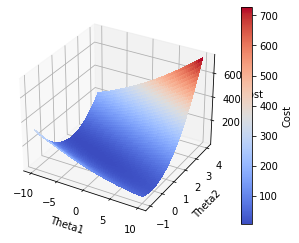

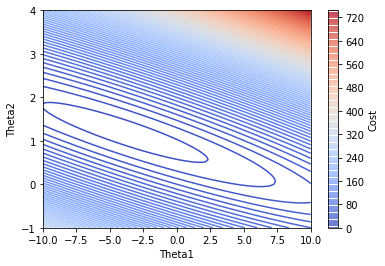

In [17]:
theta1_vector = np.linspace(-10, 10, 100)
theta2_vector = np.linspace(-1, 4, 100)
cost_vector = np.zeros((len(theta2_vector), len(theta1_vector)))

# create Z grid for the coordinate system
for i in range(len(theta2_vector)):
    for j in range(len(theta1_vector)):
        cost_vector[i][j] = vectorized_compute_cost(X, y, np.array([[theta1_vector[j]],[theta2_vector[i]]]))

# transfer X, Y vector to grid for the coordinate system
theta1_vector_mesh, theta2_vector_mesh = np.meshgrid(theta1_vector, theta2_vector)

print(theta1_vector_mesh)
print(theta2_vector_mesh)
print(cost_vector)

# 3D surface figure
fig1 = plt.figure()
ax1 = fig1.gca(projection="3d")
ax1.set_xlabel("Theta1")
ax1.set_ylabel("Theta2")
ax1.set_zlabel("Cost")
surf = ax1.plot_surface(theta1_vector_mesh, theta2_vector_mesh, cost_vector, cmap=cm.coolwarm, linewidth=0, antialiased=False)
cbar1 = fig1.colorbar(surf)
cbar1.set_label("Cost")

# contour figure
fig2, ax2 = plt.subplots()
contour = ax2.contour(theta1_vector_mesh, theta2_vector_mesh, cost_vector, levels=100, cmap=cm.coolwarm)
ax2.set_xlabel("Theta1")
ax2.set_ylabel("Theta2")
cbar2 = fig2.colorbar(contour)
cbar2.set_label("Cost")
plt.show()


# 3. Linear regression with multiple variables


In [18]:
# load data
data_file_2 = Path(os.path.abspath('')).absolute() / "data" / "ex1data2.txt"
data_set_2 = pd.read_csv(data_file_2, header=None, names=["Size", "Bedrooms", "Price"])
x = np.array(data_set_2.iloc[:, :2])
y = np.array(data_set_2.iloc[:, 2:])
print(data_set_2.head())
print(x)
print(y)

Size  Bedrooms   Price
0  2104         3  399900
1  1600         3  329900
2  2400         3  369000
3  1416         2  232000
4  3000         4  539900
[[2104    3]
 [1600    3]
 [2400    3]
 [1416    2]
 [3000    4]
 [1985    4]
 [1534    3]
 [1427    3]
 [1380    3]
 [1494    3]
 [1940    4]
 [2000    3]
 [1890    3]
 [4478    5]
 [1268    3]
 [2300    4]
 [1320    2]
 [1236    3]
 [2609    4]
 [3031    4]
 [1767    3]
 [1888    2]
 [1604    3]
 [1962    4]
 [3890    3]
 [1100    3]
 [1458    3]
 [2526    3]
 [2200    3]
 [2637    3]
 [1839    2]
 [1000    1]
 [2040    4]
 [3137    3]
 [1811    4]
 [1437    3]
 [1239    3]
 [2132    4]
 [4215    4]
 [2162    4]
 [1664    2]
 [2238    3]
 [2567    4]
 [1200    3]
 [ 852    2]
 [1852    4]
 [1203    3]]
[[399900]
 [329900]
 [369000]
 [232000]
 [539900]
 [299900]
 [314900]
 [198999]
 [212000]
 [242500]
 [239999]
 [347000]
 [329999]
 [699900]
 [259900]
 [449900]
 [299900]
 [199900]
 [499998]
 [599000]
 [252900]
 [255000]
 [242900]
 [259

## 3.1 Feature Normalization

In [19]:
# feature normalization (standardization)
def featureNormalize(x):
    mu = np.mean(x, axis=0)
    sigma = np.std(x, axis=0)
    # get normalized_x from element-wise operations
    normalized_x = (x - mu) / sigma
    # check if res_mu == 0 and res_variance = 1
    # res_mu = np.mean(normalized_x, axis=0)
    # res_variance = np.var(normalized_x, axis=0)
    # print(res_mu)
    # print(res_variance)
    return normalized_x, mu, sigma

normalized_x, mu, sigma = featureNormalize(x)
print(normalized_x)
print(mu)
print(sigma)

# number of training examples
m = len(normalized_x)
# insert np.ones(m) to column 0
X = np.insert(normalized_x, 0, np.ones(m), axis=1)
print(X)

[[ 1.31415422e-01 -2.26093368e-01]
 [-5.09640698e-01 -2.26093368e-01]
 [ 5.07908699e-01 -2.26093368e-01]
 [-7.43677059e-01 -1.55439190e+00]
 [ 1.27107075e+00  1.10220517e+00]
 [-1.99450507e-02  1.10220517e+00]
 [-5.93588523e-01 -2.26093368e-01]
 [-7.29685755e-01 -2.26093368e-01]
 [-7.89466782e-01 -2.26093368e-01]
 [-6.44465993e-01 -2.26093368e-01]
 [-7.71822042e-02  1.10220517e+00]
 [-8.65999486e-04 -2.26093368e-01]
 [-1.40779041e-01 -2.26093368e-01]
 [ 3.15099326e+00  2.43050370e+00]
 [-9.31923697e-01 -2.26093368e-01]
 [ 3.80715024e-01  1.10220517e+00]
 [-8.65782986e-01 -1.55439190e+00]
 [-9.72625673e-01 -2.26093368e-01]
 [ 7.73743478e-01  1.10220517e+00]
 [ 1.31050078e+00  1.10220517e+00]
 [-2.97227261e-01 -2.26093368e-01]
 [-1.43322915e-01 -1.55439190e+00]
 [-5.04552951e-01 -2.26093368e-01]
 [-4.91995958e-02  1.10220517e+00]
 [ 2.40309445e+00 -2.26093368e-01]
 [-1.14560907e+00 -2.26093368e-01]
 [-6.90255715e-01 -2.26093368e-01]
 [ 6.68172729e-01 -2.26093368e-01]
 [ 2.53521350e-01 -2

## 3.2 Gradient Descent

[[ 1.00000000e+00  1.31415422e-01 -2.26093368e-01]
 [ 1.00000000e+00 -5.09640698e-01 -2.26093368e-01]
 [ 1.00000000e+00  5.07908699e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.43677059e-01 -1.55439190e+00]
 [ 1.00000000e+00  1.27107075e+00  1.10220517e+00]
 [ 1.00000000e+00 -1.99450507e-02  1.10220517e+00]
 [ 1.00000000e+00 -5.93588523e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.29685755e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.89466782e-01 -2.26093368e-01]
 [ 1.00000000e+00 -6.44465993e-01 -2.26093368e-01]
 [ 1.00000000e+00 -7.71822042e-02  1.10220517e+00]
 [ 1.00000000e+00 -8.65999486e-04 -2.26093368e-01]
 [ 1.00000000e+00 -1.40779041e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.15099326e+00  2.43050370e+00]
 [ 1.00000000e+00 -9.31923697e-01 -2.26093368e-01]
 [ 1.00000000e+00  3.80715024e-01  1.10220517e+00]
 [ 1.00000000e+00 -8.65782986e-01 -1.55439190e+00]
 [ 1.00000000e+00 -9.72625673e-01 -2.26093368e-01]
 [ 1.00000000e+00  7.73743478e-01  1.10220517e+00]
 [ 1.00000000e+00  1.31050078e+

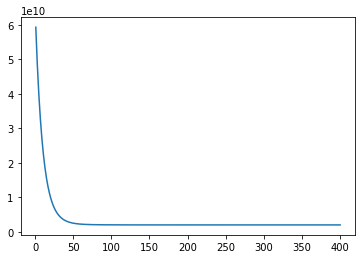

[[ 1.         -0.44604386 -0.22609337]]
293083.206130548


In [20]:
alpha = 0.1
iterations = 400
init_theta = np.zeros((3, 1))
print(X)
learned_theta, costs = gradientDescent(X, y, init_theta, alpha, iterations)
print(learned_theta)
print(costs[-5 : -1])

# show if cost converage
fig, ax = plt.subplots()
ax.plot(range(1, iterations + 1), costs, "-")
plt.show()

# normalize test data input
def normalize_test_x(x, mu, sigma):
    normalized_test_x = (x - mu) / sigma
    return normalized_test_x

# normalize input before prediction
normalized_test_x = normalize_test_x(np.array([[1650, 3]]), mu, sigma)
# insert 1 to normalized_test_x
test_x = np.insert(normalized_test_x, 0, 1, 1)
multi_prediction = (test_x @ learned_theta).item()

print(test_x)
print(multi_prediction)

### 3.2.1 Selecting learning rates

[0.1        0.11919192 0.13838384 0.15757576 0.17676768 0.1959596
 0.21515152 0.23434343 0.25353535 0.27272727 0.29191919 0.31111111
 0.33030303 0.34949495 0.36868687 0.38787879 0.40707071 0.42626263
 0.44545455 0.46464646 0.48383838 0.5030303  0.52222222 0.54141414
 0.56060606 0.57979798 0.5989899  0.61818182 0.63737374 0.65656566
 0.67575758 0.69494949 0.71414141 0.73333333 0.75252525 0.77171717
 0.79090909 0.81010101 0.82929293 0.84848485 0.86767677 0.88686869
 0.90606061 0.92525253 0.94444444 0.96363636 0.98282828 1.0020202
 1.02121212 1.04040404 1.05959596 1.07878788 1.0979798  1.11717172
 1.13636364 1.15555556 1.17474747 1.19393939 1.21313131 1.23232323
 1.25151515 1.27070707 1.28989899 1.30909091 1.32828283 1.34747475
 1.36666667 1.38585859 1.40505051 1.42424242 1.44343434 1.46262626
 1.48181818 1.5010101  1.52020202 1.53939394 1.55858586 1.57777778
 1.5969697  1.61616162 1.63535354 1.65454545 1.67373737 1.69292929
 1.71212121 1.73131313 1.75050505 1.76969697 1.78888889 1.808080

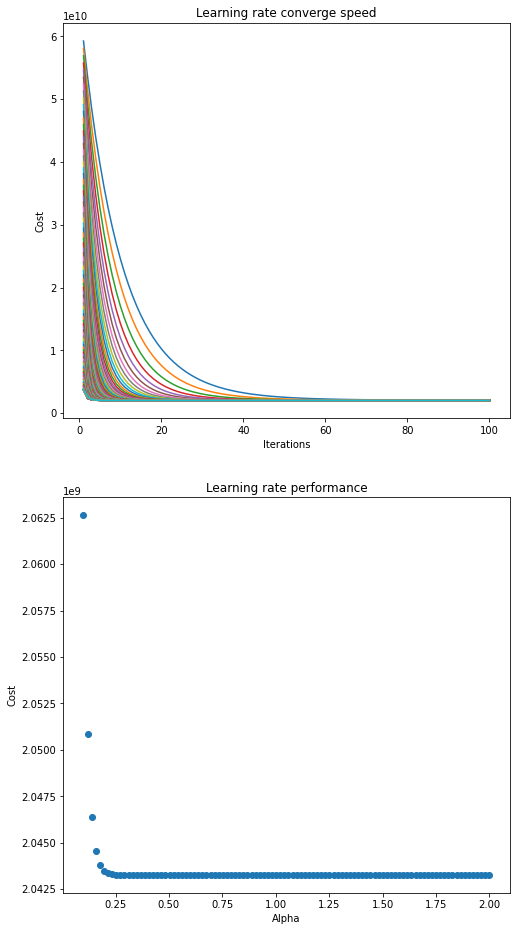

[2062616003.8237162, 2050830079.4706573, 2046368359.2740948, 2044560112.9107306, 2043811459.6489816, 2043500177.8444092, 2043370925.7514842, 2043317425.0161197, 2043295361.4990642, 2043286297.9415133, 2043282589.4598079, 2043281078.1771545, 2043280464.7967405, 2043280216.8649302, 2043280117.0635989, 2043280077.0575552, 2043280061.0883496, 2043280054.7409992, 2043280052.2289045, 2043280051.238993, 2043280050.8506148, 2043280050.6989112, 2043280050.6399188, 2043280050.6170814, 2043280050.6082804, 2043280050.6049044, 2043280050.6036146, 2043280050.603125, 2043280050.6029396, 2043280050.6028702, 2043280050.6028435, 2043280050.6028335, 2043280050.602831, 2043280050.602829, 2043280050.602829, 2043280050.6028283, 2043280050.6028285, 2043280050.6028285, 2043280050.602828, 2043280050.602829, 2043280050.6028285, 2043280050.6028285, 2043280050.6028285, 2043280050.6028285, 2043280050.6028285, 2043280050.6028283, 2043280050.6028285, 2043280050.602829, 2043280050.602828, 2043280050.6028275, 20432800

In [21]:
alpha_list = np.linspace(0.1, 2, 100)
final_costs = []

print(alpha_list)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,16))

for alpha in alpha_list:
    iters = 100
    learned_theta, costs = gradientDescent(X, y, init_theta, alpha, iters)
    final_costs.append(costs[-1])
    ax1.plot(range(1, iters + 1), costs, "-", label = "alpha {}".format(alpha))

ax1.set_title("Learning rate converge speed")
ax1.set_xlabel("Iterations")
ax1.set_ylabel("Cost")
# ax1.legend()

ax2.plot(alpha_list, final_costs, "o")
ax2.set_title("Learning rate performance")
ax2.set_xlabel("Alpha")
ax2.set_ylabel("Cost")

plt.show()

best_alpha = alpha_list[final_costs.index(min(final_costs))]
print(final_costs)
print("best alpha: {}".format(best_alpha))

learned_theta, costs = gradientDescent(X, y, init_theta, best_alpha, iterations)
prediction = (test_x @ learned_theta).item()

print("theta using best alpha: {}".format(learned_theta))
print("prediction: {}".format(prediction))

## 3.3 Normal Equations

In [22]:
calculated_theta = np.linalg.inv(X.T @ X) @ X.T @ y
calculated_prediction = (test_x @ calculated_theta).item()
print(calculated_theta)
print(calculated_prediction)

[[340412.65957447]
 [109447.79646964]
 [ -6578.35485416]]
293081.46433489607
